### MID-TERM PROJECT

In [84]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

import re

import xgboost as xgb

In [85]:
df = pd.read_csv("C:/Users/Co/Desktop/Midterm Project/MonkeyPox.csv")

In [86]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [87]:
df.dtypes

Patient_ID                        object
Systemic Illness                  object
Rectal Pain                         bool
Sore Throat                         bool
Penile Oedema                       bool
Oral Lesions                        bool
Solitary Lesion                     bool
Swollen Tonsils                     bool
HIV Infection                       bool
Sexually Transmitted Infection      bool
MonkeyPox                         object
dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [89]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [90]:
df.columns

Index(['patient_id', 'systemic_illness', 'rectal_pain', 'sore_throat',
       'penile_oedema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils',
       'hiv_infection', 'sexually_transmitted_infection', 'monkeypox'],
      dtype='object')

In [91]:
## let's drop the patien_id column which won't contribute to the model using domain knowldedge.
df.drop(['patient_id'],axis=1,inplace=True)

In [92]:
# data variables are object ar boolean

cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
print(f'Columns with categorical variables are: {cat_cols} \n')


bool_cols = list(df.dtypes[df.dtypes == 'bool'].index)
print(f'Columns with boolean are: {bool_cols}')

Columns with categorical variables are: ['systemic_illness', 'monkeypox'] 

Columns with boolean are: ['rectal_pain', 'sore_throat', 'penile_oedema', 'oral_lesions', 'solitary_lesion', 'swollen_tonsils', 'hiv_infection', 'sexually_transmitted_infection']


In [93]:
#convert boolean to integers
df[bool_cols] = df[bool_cols].astype(int)
df[bool_cols]

,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection
0,0,1,1,1,0,1,0,0
1,1,0,1,1,0,0,1,0
2,0,1,1,0,0,0,1,0
3,1,0,0,0,1,1,1,0
4,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1
24996,0,1,1,0,1,1,1,1
24997,1,1,0,0,1,1,0,0
24998,0,1,0,1,1,1,0,0


In [94]:
df.describe()

,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [95]:
for col in df.columns:
    gra = df[col].value_counts()
    print(f'{col.upper()}: \n')
    print(gra)
    print('\n')
    

SYSTEMIC_ILLNESS: 

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: systemic_illness, dtype: int64


RECTAL_PAIN: 

0    12655
1    12345
Name: rectal_pain, dtype: int64


SORE_THROAT: 

1    12554
0    12446
Name: sore_throat, dtype: int64


PENILE_OEDEMA: 

1    12612
0    12388
Name: penile_oedema, dtype: int64


ORAL_LESIONS: 

0    12514
1    12486
Name: oral_lesions, dtype: int64


SOLITARY_LESION: 

1    12527
0    12473
Name: solitary_lesion, dtype: int64


SWOLLEN_TONSILS: 

1    12533
0    12467
Name: swollen_tonsils, dtype: int64


HIV_INFECTION: 

1    12584
0    12416
Name: hiv_infection, dtype: int64


SEXUALLY_TRANSMITTED_INFECTION: 

0    12554
1    12446
Name: sexually_transmitted_infection, dtype: int64


MONKEYPOX: 

Positive    15909
Negative     9091
Name: monkeypox, dtype: int64




## Data Exploration

In [96]:
# cat_cols

### Systemic Illness

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: systemic_illness, dtype: int64



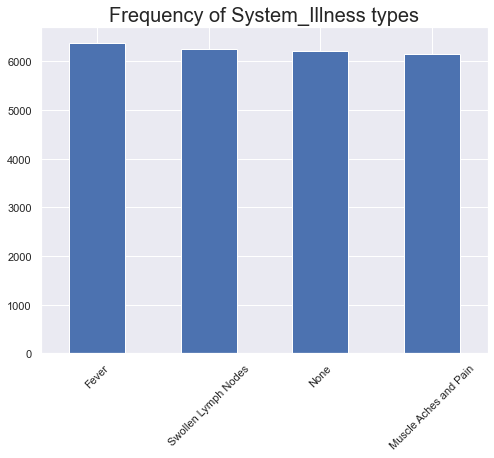

In [97]:
print(df.systemic_illness.value_counts())
print('')
plt.figure(figsize=(8, 6))
df.systemic_illness.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Frequency of System_Illness types', size=20)
plt.show()

systemic_illness       monkeypox
Fever                  Positive     0.748982
                       Negative     0.251018
Muscle Aches and Pain  Positive     0.524228
                       Negative     0.475772
None                   Positive     0.534749
                       Negative     0.465251
Swollen Lymph Nodes    Positive     0.732726
                       Negative     0.267274
Name: monkeypox, dtype: float64



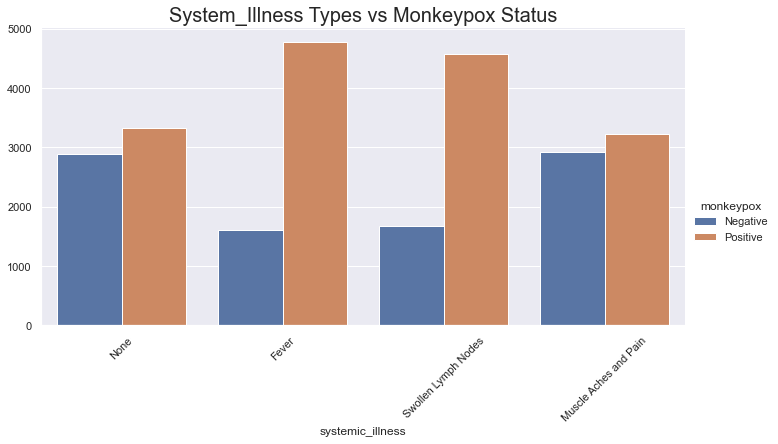

In [98]:
print(df.groupby('systemic_illness')['monkeypox'].value_counts(normalize=True))
print('')
sns.catplot(x='systemic_illness',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('System_Illness Types vs Monkeypox Status', size=20)
plt.show()

In [99]:
# bool_cols

### rectal_pain

0    12655
1    12345
Name: rectal_pain, dtype: int64

rectal_pain  monkeypox
0            Positive     0.569498
             Negative     0.430502
1            Positive     0.704901
             Negative     0.295099
Name: monkeypox, dtype: float64



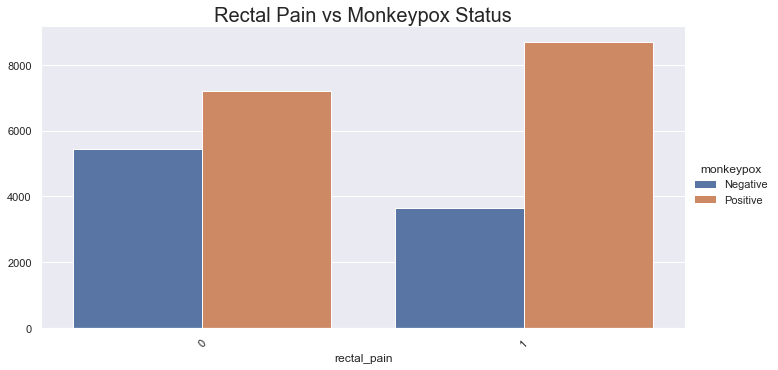

In [100]:
print(df.rectal_pain.value_counts())
print('')

print(df.groupby('rectal_pain')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='rectal_pain',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Rectal Pain vs Monkeypox Status', size=20)
plt.show()

### sore_throat

1    12554
0    12446
Name: sore_throat, dtype: int64

sore_throat  monkeypox
0            Positive     0.605737
             Negative     0.394263
1            Positive     0.666720
             Negative     0.333280
Name: monkeypox, dtype: float64



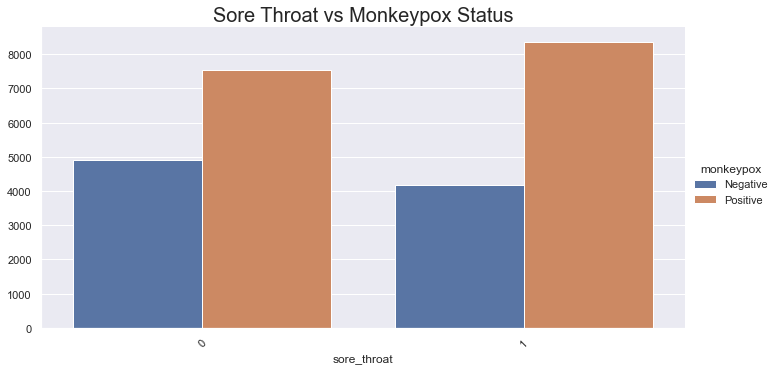

In [101]:
print(df.sore_throat.value_counts())
print('')

print(df.groupby('sore_throat')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='sore_throat',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Sore Throat vs Monkeypox Status', size=20)
plt.show()

### penile_oedema

1    12612
0    12388
Name: penile_oedema, dtype: int64

penile_oedema  monkeypox
0              Positive     0.606313
               Negative     0.393687
1              Positive     0.665874
               Negative     0.334126
Name: monkeypox, dtype: float64



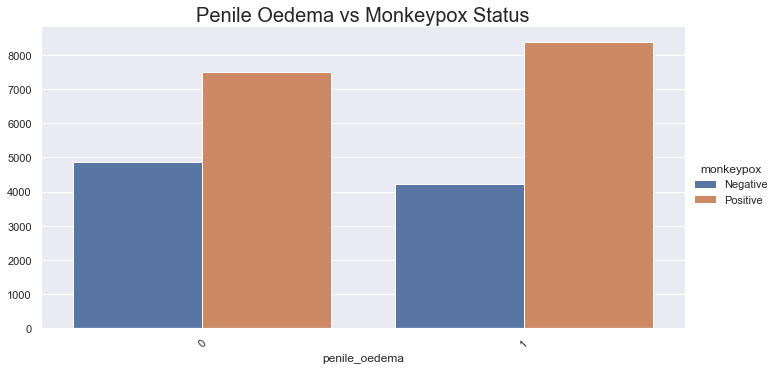

In [102]:
print(df.penile_oedema.value_counts())
print('')

print(df.groupby('penile_oedema')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='penile_oedema',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Penile Oedema vs Monkeypox Status', size=20)
plt.show()

### oral_lesions

0    12514
1    12486
Name: oral_lesions, dtype: int64

oral_lesions  monkeypox
0             Positive     0.611395
              Negative     0.388605
1             Positive     0.661381
              Negative     0.338619
Name: monkeypox, dtype: float64



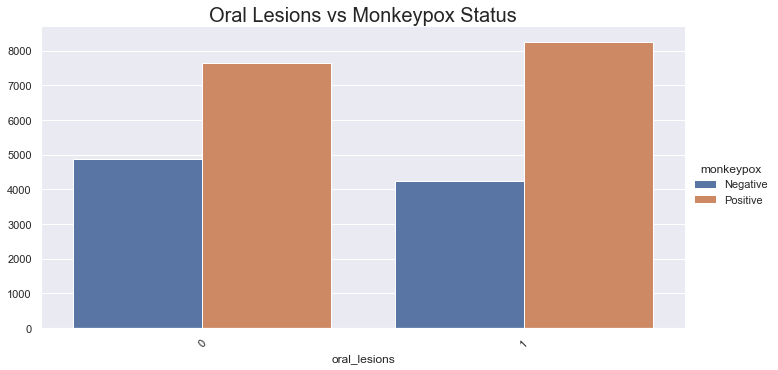

In [103]:
print(df.oral_lesions.value_counts())
print('')

print(df.groupby('oral_lesions')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='oral_lesions',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Oral Lesions vs Monkeypox Status', size=20)
plt.show()

### solitary_lesion

1    12527
0    12473
Name: solitary_lesion, dtype: int64

solitary_lesion  monkeypox
0                Positive     0.618296
                 Negative     0.381704
1                Positive     0.654347
                 Negative     0.345653
Name: monkeypox, dtype: float64



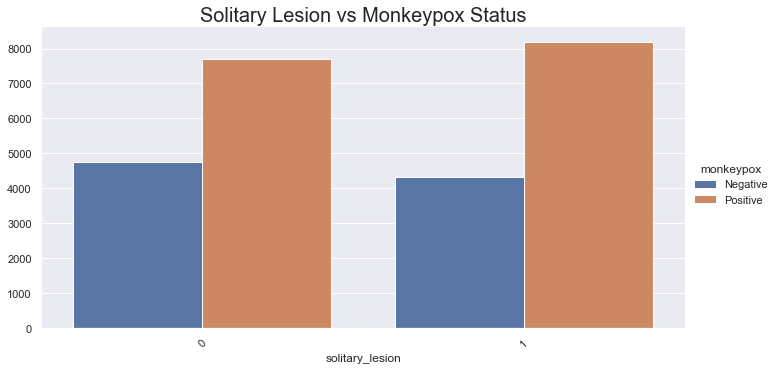

In [104]:
print(df.solitary_lesion.value_counts())
print('')

print(df.groupby('solitary_lesion')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='solitary_lesion',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Solitary Lesion vs Monkeypox Status', size=20)
plt.show()

### swollen_tonsils

swollen_tonsils  monkeypox
0                Positive     0.629983
                 Negative     0.370017
1                Positive     0.642703
                 Negative     0.357297
Name: monkeypox, dtype: float64



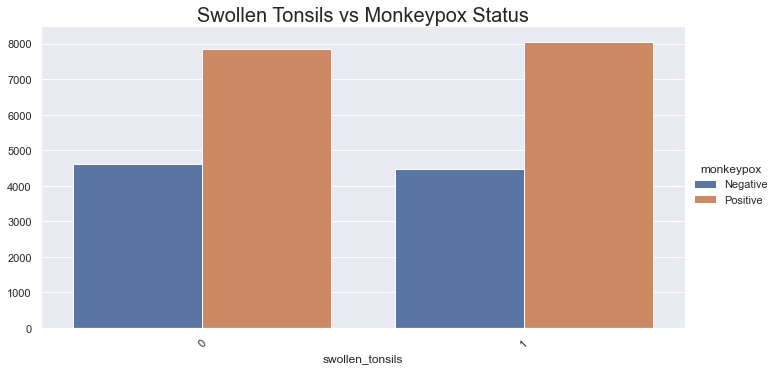

In [105]:
print(df.groupby('swollen_tonsils')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='swollen_tonsils',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Swollen Tonsils vs Monkeypox Status', size=20)
plt.show()

### HIV Infection

hiv_infection  monkeypox
0              Positive     0.565561
               Negative     0.434439
1              Positive     0.706214
               Negative     0.293786
Name: monkeypox, dtype: float64



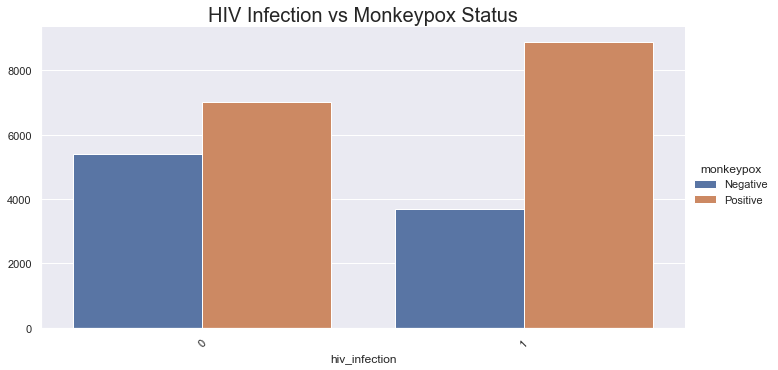

In [106]:
print(df.groupby('hiv_infection')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='hiv_infection',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('HIV Infection vs Monkeypox Status', size=20)
plt.show()

### Sexually Transmitted Infection

sexually_transmitted_infection  monkeypox
0                               Positive     0.577266
                                Negative     0.422734
1                               Positive     0.695967
                                Negative     0.304033
Name: monkeypox, dtype: float64



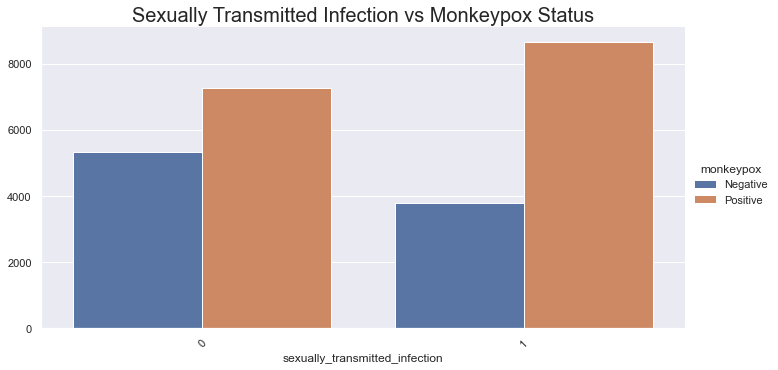

In [107]:
print(df.groupby('sexually_transmitted_infection')['monkeypox'].value_counts(normalize=True))
print('')

sns.catplot(x='sexually_transmitted_infection',kind='count', hue='monkeypox', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Sexually Transmitted Infection vs Monkeypox Status', size=20)
plt.show()

## Oberservation from Plot
##### `=> Cases of Fever and Swollen lymph nodes under 'Systemic Illness' show a higher tendency for Positive Cases of Monkeypox`
##### `=> True cases of 'Rectal Pain' show a higher tendency for Positive Cases of Monkeypox`
##### `=> True cases of 'HIV infection' show a higher tendency for Positive Cases of Monkeypox`
##### `=> True cases of 'Sexually Transmitted Infection' show a higher tendency for Positive Cases of Monkeypox`

In [108]:
df['monkeypox'] = df['monkeypox'].replace(['Positive', 'Negative'], [1, 0])

In [109]:
df.monkeypox.value_counts()

1    15909
0     9091
Name: monkeypox, dtype: int64

In [110]:
df.dtypes

systemic_illness                  object
rectal_pain                        int32
sore_throat                        int32
penile_oedema                      int32
oral_lesions                       int32
solitary_lesion                    int32
swollen_tonsils                    int32
hiv_infection                      int32
sexually_transmitted_infection     int32
monkeypox                          int64
dtype: object

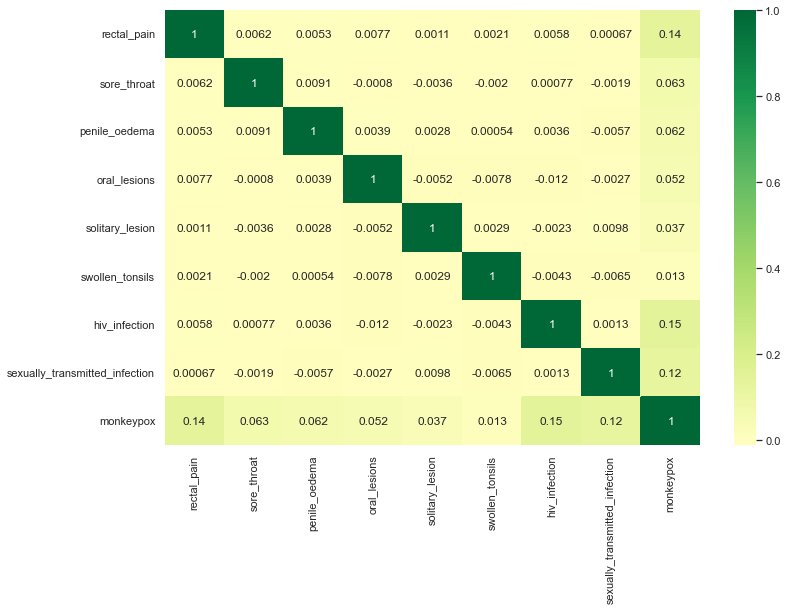

In [111]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(12,8))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0) 